In [2]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly
from tensorflow.keras import datasets

In [11]:
from tensorflow.keras import utils

(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

X_train = X_train / 255
X_test = X_test / 255

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [12]:
model = Sequential([
    ly.Conv2D(32, (5,5), padding="same", input_shape=[28, 28, 1]),
    ly.MaxPool2D((2,2)),
    ly.Conv2D(64, (5, 5), padding="same"),
    ly.MaxPool2D((2,2)),
    ly.Flatten(),
    ly.Dense(1024, activation="relu"),
    ly.Dropout(0.2),
    ly.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
his = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1196 - accuracy: 0.9631 - val_loss: 0.0508 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0489 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0451 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0377 - accuracy: 0.9892 - val_loss: 0.0516 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0377 - accuracy: 0.9901 - val_loss: 0.0597 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.0886 - val_accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0309 - accuracy: 0.9922 - val_loss: 0.0700 - val_a

No handles with labels found to put in legend.


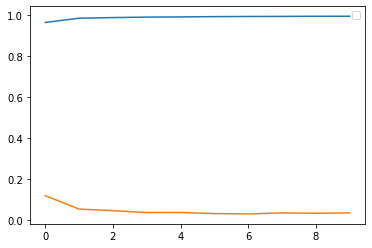

In [14]:
import matplotlib.pyplot as plt

plt.plot(his.history["accuracy"])
plt.plot(his.history["loss"])
plt.legend()
plt.show()

In [15]:
lest_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9892


In [16]:
test_acc

0.9891999959945679

In [17]:
tfjs.converters.save_keras_model(model, "models")

R:\Work\Anacond\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
